In [128]:
import pandas as pd
import numpy as np 

In [129]:
df=pd.read_csv('HousingData.csv')

In [130]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [131]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [132]:
df.fillna(df.mean(),inplace=True)

In [133]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [137]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train = scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

In [138]:
from keras.models import Sequential 
from keras.layers import Dense

In [139]:
model=Sequential()

In [140]:
model.add(Dense(128,activation='relu',input_shape=(13,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1792      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.fit(x_train,y_train,epochs=250,batch_size=64,validation_split=0.02)

Epoch 1/250
6/6 [==============================] - 1s 35ms/step - loss: 545.2637 - mae: 21.6325 - val_loss: 644.2717 - val_mae: 23.1270
Epoch 2/250
6/6 [==============================] - 0s 8ms/step - loss: 516.9670 - mae: 20.9678 - val_loss: 613.1823 - val_mae: 22.4785
Epoch 3/250
6/6 [==============================] - 0s 9ms/step - loss: 481.9775 - mae: 20.1526 - val_loss: 575.3539 - val_mae: 21.6439
Epoch 4/250
6/6 [==============================] - 0s 10ms/step - loss: 436.2575 - mae: 19.0323 - val_loss: 524.2274 - val_mae: 20.4765
Epoch 5/250
6/6 [==============================] - 0s 9ms/step - loss: 374.9531 - mae: 17.4305 - val_loss: 457.9429 - val_mae: 18.8495
Epoch 6/250
6/6 [==============================] - 0s 9ms/step - loss: 298.3874 - mae: 15.2404 - val_loss: 374.5884 - val_mae: 16.6108
Epoch 7/250
6/6 [==============================] - 0s 6ms/step - loss: 203.1583 - mae: 12.3261 - val_loss: 278.4980 - val_mae: 13.6290
Epoch 8/250
6/6 [==============================] - 0s

In [142]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 16.4154 - mae: 2.5831


[16.415449142456055, 2.5831334590911865]

In [143]:
y_predict=model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [144]:
import matplotlib.pyplot as plt 

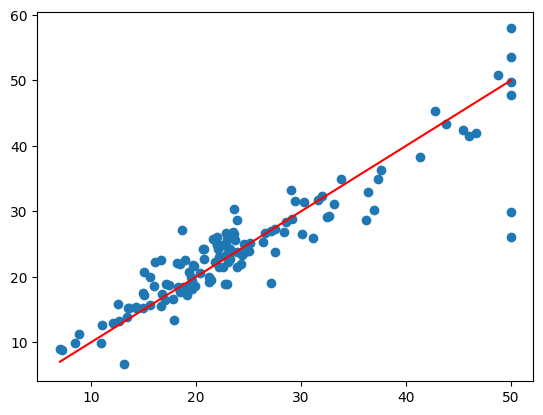

In [145]:
plt.scatter(y_test, y_predict)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')


In [146]:
from sklearn.metrics import r2_score,mean_squared_error

In [147]:
print(r2_score(y_test,y_predict))
mean_squared_error(y_test,y_predict)

0.8353313647167564


16.415449016541793